# Análisis de Spectroscopía UVES

Utilizaremos los datos obtenidos con el instrumento UVES de ESO's VLT 
Los datos son observaciones de MNLup, una candidata a protoestrella T-Tauri.

El primer paso es bajar los datos a utilizar del repositorio de Astropy:

In [2]:
import tarfile
from astropy.utils.data import download_file
url='http://data.astropy.org/tutorials/UVES/data_UVES.tar.gz'
f=tarfile.open(download_file(url,cache=True),mode='r|*')

In [2]:
working_dir_path = '.'   #Cambiar al directorio donde desean guardar los datos

In [ ]:
f.extractall(path=working_dir_path)

## El nacimiento de las estrellas
Las estrellas se originan de nubes de gas y polvo, frías y obscuras que se encuentran abundantemente distribuidas por la Galaxia. Un evento catastrófico, como la explosión de una supernova, inicia un proceso de contracción en la nube de gas y polvo bajo la fuerza de la gravedad, formando protoestrellas.
A medida que la protoestrella evoluciona, su presión interna y temperatura empiezan a incrementarse; en algún momentos se inicia el proceso de fusión de hidrógeno y una estrella ha nacido.
Las estrellas más jóvenes, calientes y brillantes emiten radiación ultravioleta y exictan el gas interestelar que las rodea. El resultado es una nebulosa brillante, en un tono rojizo característico del hidrógeno excitado.


![Nebulosa de Orion](./Orion_Nebula.png)

La Nebulosa de Orion emite su propia luz, con el característico espectro de gas caliento y delgado. Por esta razón se le clasifica como una **nebulosa de emisón**. Estas nebulosas tienen una masa entre 100 y 10000 masas solares, distribuída en un volumen gigantesco.  Las nebulosas de emisión se encuentran cerca de estrellas calientes y luminosas de tipo espectral O y B, que emiten gran cantidad de radiación ultravioleta.
Las nebulosas en emisión están compuestas principalmente de hidrógeno ionizado por la radiación ultravioleta de las estrellas cercanas. Por esto se les conoce como regiones HII.UV

Los granos de polvo presentes en el medio interesterar consitituyen las nebulosas obscuras y las reflectoras. Las **nebulosas obscuras** son tan opacas que bloquean la luz proveniente de estrellas que se encuentran detras de ellas. Un ejemplo de nebulosa obscura, es la nebulosa conocida como Horsehead, en la imagen.

![Nebulosa de Horsehead](./Horsehead.png)

En la imagen también podemos observar nebulosas reflectoras, estas nebulosas se muestran como una bruma azul rodeando a una estrella; formada for finos granos de polvo en menor concentración que en una nebulosa obscura. En la imagen se pueden ver también nebulosas en emisión, con su característico tono rojizo.

### Colapso gravitacional inicial
Para que el material interestelar condense y forme una estrella, la fuerza de gravedad debe vencer a la presión interna. Las estrellas deben formarse en regiones densas de material interestelar. Para ayudar a la formación la presión del medio interestelar debe ser relativamente baja, es decir, tan fría como sea posible.

Cuando la protoestrella se forma y empieza a evolucionar, su luminosidad y termperatura de superficie cambian. Las trazas se pueden ver en el diagrama HR. 

![Nebulosa de Horsehead](./HR_protoestrellas.png)

Los detalles de esa evolución dependen de la masa de la estrella. Para una protoestrella con una masa similar a la solar, las capas externas son frías y opacas. Esto significa que la radiación no llega a la superficie y la energía fluye por convección. Así que mantiene su temperatura de superficie, mientras su luminosidad y radio decrecen.
Las protoestrellas más masivas, cerca de las $4M_{\odot}$, se contraen y calientan más rápidamente, iniciando la fusión de hidrógeno muy pronto. Con esto se mantiene la luminosidad mientras que la temperatura aumenta a medida que la estrella se contrae.
Las estrellas en la secuencia principal tienen un rango de masas entre 0.08 y 200 $M_{\odot}$, siendo extremadamente raras las masivas.

### T Tauri
La expulsión de materia al espacio es una característica de las estrellas T Tauri. Son protoestrellas con líneas de emisión y absorción y cuya luminosidad cabie irregularmente en escalas muy cortas de tiempo (días). Las estrellas T Tauri tienenen masas por debajo de los 2-3 $M_{\odot}$ y con edades cercanas a $10^6$ años, en un diagrama HR aparecen por encima del final derecho de la secuencia principal. Las líneas de emisión de estas estrellas sugiere que están rodiadas por disco de acreción caliente y delgado. Lo corrimientos Doppler de estas líneas de emisión sugieren que las protoestrellas expulsan el gas a velocidades cercanas a lo 80 km/s.
En promedio, las estrellas T Tauri expulsan cerca de $10^{-8}$ a $10^{-7}$ masas solares de material por año. La fase T Tauri de una estrella puede durar $10^7$ años, por lo que habrá expulsado aproximadamente una masa solar de material.
Las estrellas T Tauri tienen líneas de emisión prohíbidas, estas líneas provienen de estados exitados que tienen vidas largas, es decir,electrones con menor probabilidad de decaer a un nivel más bajo. En plasmas densos, estas transiciones no se observan debido a que la de-exitación debido a colisiones es mayor que el decaimiento radiativo. En plasmas menos densos, como el caso del material circumestelar, esos niveles de exitación se mantienen intactos por más tiempo, decayendo finalmente y produciendo las líneas de emisión prohíbidas. 
En estas estrellas se detecta material cayendo como siendo expulsado, con lo que su espectro varía irregularmente con el tiempo.

## Instrumento UVES del VLT
UVES es un espectrógrafo echelle de dos brazos, con un rango de 300 a 500 nm en el azul y de 420 a 1100 nm en el rojo. La resolución espectral para una rendija de 1-segundo de arco es de 40000. La máxima resolución alcanzada con un muestreo adecuado es de 80000 para el azul y 110000 para el rojo. Los dos brazos de UVES están equipados con detectores CCD, un chip en el azul y un mosaico de dos en el rojo. El CCD azul es 2kx4k, 15{\mu} pixel EEV CCD-44. El CCD Rojo está formado por un chip EEV y otro MIT/LL CCID-20 para la parte más roja del espectro.

## Desarrollando el análisis
Crearemos una lista para manejar mejor los distintos archivos fits; utilizaremos el WCS para convertir los pixeles en coordenadas reales. 
Desarrollaremos herramientas reutilizables en un fichero spectra_utils.py.
Empecemos:

In [3]:
from glob import glob
import os
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
globpath = os.path.join(working_dir_path, 'UVES/*.fits')
print(globpath)
filelist = glob(globpath)
filelist.sort()


./UVES/*.fits


In [4]:
#Probaremos leer uno de los archivos
sp=fits.open(filelist[0])
sp.info()

Filename: ./UVES/r.UVES.2011-08-11T232352.266-A01_0000.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     609   (42751,)   float32   


Extraeremos la información del header del fichero fits. Sobretodo la información sobre las coordenadas, para definir el tamaño de los arrays que utilizaremos y tener el listado de longitudes de onda.

In [5]:
header = sp[0].header
wcs=WCS(header)
index = np.arange(header['NAXIS1'])
wavelength = wcs.wcs_pix2world(index[:,np.newaxis],0)
wavelength.shape

(42751, 1)

In [6]:
#Necesitamos contraer wavelength de una matriz nx1 a un vector n
wavelength = wavelength.flatten()

In [7]:
wavelength.shape

(42751,)

In [8]:
#El flujo está contenido en la imagen primaria
flux = sp[0].data

### Creando una función reutilizable
Hemos creado un archivo spectra_utils.py que contiene varias de las funciones que utilizaremos; lo invocaremos por medio de import spectra_utils; no es necesario invocar las funciones individualmente, pero deberemos llamarlas de la siguiente forma
spectra_utils.read_spec; por ejemplo.  Si las llamamos de forma independiente podremos utilizarlas sin el encabezado spectra_utils.
El archivo spectra_utils.py se encuentra en el mismo repositorio.

In [9]:
from spectra_utils import read_spec, wave2doppler, region_around_line


El conjunto de datos de espectros UVES han sido obtenido con la misma configuración: tiempo de exposición (EXPTIME), punto cero de la longitud de onda (CRVAL1) y el brazo utilizado (HIERARCH ESO INS PATH'). Podemos leer estas carácteristicas del header

In [13]:
header['EXPTIME'], header['CRVAL1'], header['HIERARCH ESO INS PATH']


(1200.0013, 3732.05623191818, 'BLUE')

La secuencia utilizada para reducir los datos utiliza una malla de longitudes de onda fija, así que las longitudes de onda son las mismas para todos los espectros. 
Podemos leer los flujos y utilizar la variable wavelength para todos

In [16]:
flux = np.zeros ((len(filelist), len(wavelength)))
#la fecha de observación viene en una cadena de 23 caracteres, utilizaremos el formato U23
date = np.zeros((len(filelist)), dtype ='U23')
for i, fname in enumerate(filelist):
    w,f,date_obs = read_spec(fname)
    flux[i,:]=f
    date[i] = date_obs
    

Debemos agregar unidades a nuestras variables para convertirlas en cantidades físicas. Además necesitaremos algunas constantes como c y G.

In [17]:
import astropy.units as u
from astropy.constants.si import c, G, M_sun, R_sun
wavelength = wavelength * u.AA
#otras constantes que tenemos que definir
heliocentric = -23. * u.km/u.s
v_rad = -4.77 * u.km / u.s # Strassmeier et al. (2005)
R_MN_Lup = 0.9 * R_sun
M_MN_Lup = 0.6 * M_sun
vsini = 74.6 * u.km/u.s #velocidad proyectada por el seno de la inclinación
period = 0.439 * u.day
inclination = 45.*u.degree
#convertimos los grados en radianes
incl = inclination.to(u.radian)


Si MN_Lup es una T Tauri estará rodeada de un disco de acreción, cuya velocidad será cercana a la velocidad de caída libre

\begin{equation}
E_{kin}=E_{grav}
\end{equation}


\begin{equation}
\frac{1}{2}mv^2 = G\frac{mM_*}{R_*}
\end{equation}

In [19]:
v_accr = (2.* G * M_MN_Lup/R_MN_Lup)**0.5
print(v_accr)

504469.02756449714 m / s


In [20]:
#Comparemos la velocidad de rotación con la velocidad de acreción
v_rot = vsini / np.sin(incl)
v_accr/v_rot

<Quantity 4781.681907365138 m / km>

In [21]:
#debemos corregir el hecho de que aparezca con 
#unidades de longitud en numerador y denominador
(v_accr / v_rot).decompose()

<Quantity 4.7816819073651375>

Ahora tenemos que corregir la escala longitud de onda debido a la velocidad heliocéntrica

\begin{equation}
\lambda_{heliocentric} = \lambda_{bariocentric} * \bigg(1 + \frac{V_{helio}}{c}\bigg)
\end{equation}

In [ ]:
#we need to specify that the 1 in the equation is dimensionless

In [23]:
wavelength = wavelength * (1.*u.dimensionless_unscaled + heliocentric/c)

Espectroscopicamente, MN Lup está clasificada como M0 V, así que la aceleración de la gravedad en la superficie $\log(g)$ debe ser comparable a la del Sol ($log(g_{odot}) = 4.4$). Normalmente expresada en unidades cgs.

In [24]:
print(np.log10((G*M_MN_Lup/R_MN_Lup**2)/u.cm*u.second**2))

4.308094379918043


Vamos a escribir una función para convertir la longitud de onda en una escala de velocidades. Esta función nos permitirá mostrar que el corrimiento al rojo y al azul del espectro relativo a la línea CaII H. Probaremos la función calculando el corrimiento Doppler de las siguientes longitudes de onda relativas a $H_{\alpha}$: 6562, 6563 y 6565 $\mathring A$.

In [28]:
waveclosetoHa = np.array([6562.,6563.,6565.])*u.AA

In [29]:
#la función está incluída en spectra_utils
print(wave2doppler(waveclosetoHa, 656.489*u.nm).to(u.km/u.s))

[-131.9748242   -86.30879506    5.0232632 ] km / s


Necesitamos dos funciones más para representar las velocidades calculadas anteriormente en unidades de visini; previamente substrayendo la velocidad radial de MN Lup (4.77 km/s).

In [31]:
def w2vsini(w,w0):
    v=wave2doppler(w,w0)+v_rad
    return v/vsini
    

### Conversión de tiempos
Aunque la información sobre el tiempo se puede obtener del header en varias unidades, ejercitaremos la converción temporal.

In [35]:
from astropy.time import Time
obs_time = Time(date, scale = 'utc') #de las obs-date que leímos antes
delta_t = obs_time - Time(date[0], scale = 'utc')

Ahora expresaremos la diferencia de tiempo entre observaciones en función del período de rotación de MN Lup. La converción se deber realiza de forma explísita, porque los objetos generados por time y los generados por units no son compatibles.

In [36]:
delta_p = delta_t.value * u.day/period

### Normalización del flujo al continuo local
En este ejemplo queremos ver  la evolución temporal de una línea de emisión específica en el espectro. Para poder realizar unos plots adecuados, debemos normalizar el flujo al continuo local, normalmente la línea es bastante brillante y el continuo se puede aproximar por un polinomio de segundo orden. 
Así que definimos las dos regiones a la izquierda y derecha de la línea de emisión y ajustamos un polinomio. [3925,3930] y [3938,3945} $\mathring{A}$ son los rangos escogidos.
Utilizaremos la función region_around_line incluída en spectra_utils.


In [50]:
wcaII, fcaII = region_around_line(wavelength, flux,
    [[3925*u.AA, 3930*u.AA],[3938*u.AA, 3945*u.AA]])

Generamos el ancho equivalente de las líneas de emisión para el primer espectro

In [51]:
ew = fcaII[0,:] - 1.
ew = ew[:-1] * np.diff(wcaII.to(u.AA).value)
print(ew.sum())

19.377607146


Ahora, utilizando la notación de array en numpy, podemos procesar todos los espectros simultaneamente:

In [52]:
delta_lam = np.diff(wcaII.to(u.AA).value)
ew = np.sum((fcaII - 1.)[:,:-1] * delta_lam[np.newaxis, :], axis=1)


### Plots
Utilizaremos matplotlib para generar los plots. El eje x mostrará el corrimiento Doppler expresado en unidades de velocidad rotacional. De esta manera, las particularidades que estén moduladas rotacionalmente sobresaldran entre -1 y +1.

In [96]:
x=w2vsini(wcaII, 393.366*u.nm).decompose()

(675,)

In [59]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


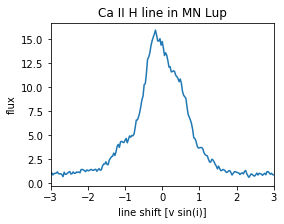

In [60]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(1,1,1)
ax.plot(x, fcaII[0,:])
ax.set_xlim([-3,+3])
ax.set_xlabel('line shift [v sin(i)]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
plt.draw()

Ahora haremos el plot de todos los espectros, dándoles un offset entre ellos.

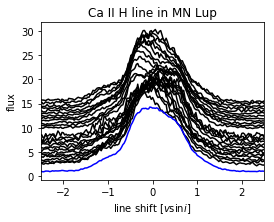

In [61]:
yshift = np.arange((fcaII.shape[0])) * 0.5
#shift the second night up by a little more
yshift[:] += 1.5
yshift[13:] += 1

fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(1,1,1)

for i in range(25):
    ax.plot(x, fcaII[i,:]+yshift[i], 'k')

#separately show the mean line profile in a different color
ax.plot(x, np.mean(fcaII, axis =0), 'b')
ax.set_xlim([-2.5,+2.5])
ax.set_xlabel('line shift [$v \\sin i$]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
fig.subplots_adjust(bottom = 0.15)
plt.draw()

Para poder mejorar el plot, calcularemos la diferencia de cada espectro con el flujo promedio


In [98]:
fmean = np.mean(fcaII, axis=0)
fdiff = fcaII - fmean[np.newaxis,:]

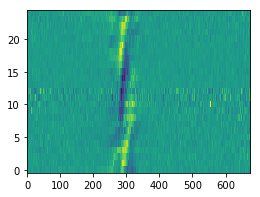

In [63]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(fdiff, aspect = "auto", origin = 'lower')

Ahora haremos un surface mesh de los datos

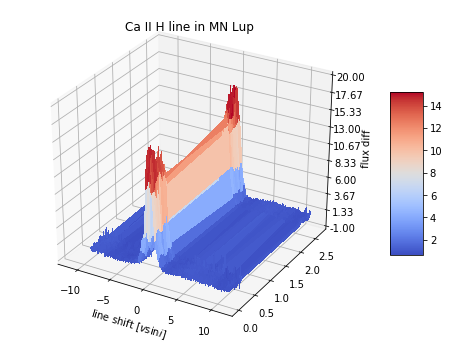

In [113]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

# Make data.
X=x
Y=delta_p
X,Y=np.meshgrid(X,Y)
Z=fcaII

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1,20)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlim([-12.5,+12.5])
ax.set_xlabel('line shift [$v \\sin i$]')
ax.set_zlabel('flux diff')
ax.set_title('Ca II H line in MN Lup')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Separando los espectros de cada noche

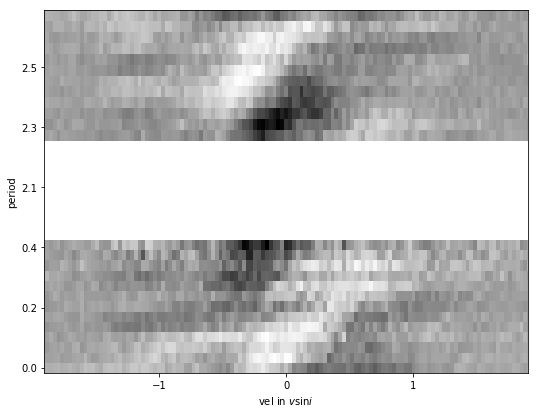

In [107]:
ind1 = delta_p < 1 * u.dimensionless_unscaled
ind2 = delta_p > 1 * u.dimensionless_unscaled
# shift a little for plotting purposes
pplot = delta_p.copy().value
pplot[ind2] -= 1.5
# image goes from x1 to x2, but really x1 should be middle of first pixel
delta_t = np.median(np.diff(delta_p))/2.
delta_x = np.median(np.diff(x))/2.
# imshow does the normalization for plotting really well, but here I do it
# by hand to ensure it goes -1,+1 (that makes color bar look good)
fdiff = fdiff / np.max(np.abs(fdiff))

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)

for ind in [ind1, ind2]:
    im = ax.imshow(fdiff[ind,:],
    extent = (np.min(x)-delta_x, np.max(x)+delta_x,
    np.min(pplot[ind])-delta_t, np.max(pplot[ind])+delta_t),
    aspect = "auto", origin = 'lower', cmap = plt.cm.Greys_r)

ax.set_ylim([np.min(pplot)-delta_t, np.max(pplot)+delta_t])
ax.set_xlim([-1.9,1.9])
ax.set_xlabel('vel in $v\\sin i$')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

def pplot(y, pos):
    'The two args are the value and tick position'
    'Function to make tick labels look good.'
    if y < 0.5:
        yreal = y
    else:
        yreal = y + 1.5
    return yreal

formatter = plt.FuncFormatter(pplot)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('period')
fig.subplots_adjust(left = 0.15, bottom = 0.15, right = 0.99, top = 0.99)
plt.draw()